# **Week2授業課題2 富士下山問題**

In [2]:
# データの読み込み

import numpy as np

csv_path = "mtfuji_data.csv"

np.set_printoptions(suppress=True)
fuji = np.loadtxt(csv_path, delimiter=',', skiprows=1)
print(fuji[:10])

[[   0.         35.134141  139.132082    0.          0.      ]
 [   1.         35.135826  139.129202    0.        322.      ]
 [   2.         35.13751   139.126322    0.        644.      ]
 [   3.         35.139194  139.123441    0.        966.      ]
 [   4.         35.140878  139.12056     0.       1288.      ]
 [   5.         35.142562  139.117679    0.       1611.      ]
 [   6.         35.144246  139.114799    6.62     1933.      ]
 [   7.         35.145929  139.111917    7.21     2255.      ]
 [   8.         35.147613  139.109036   12.2      2577.      ]
 [   9.         35.149297  139.106155   54.41     2899.      ]]


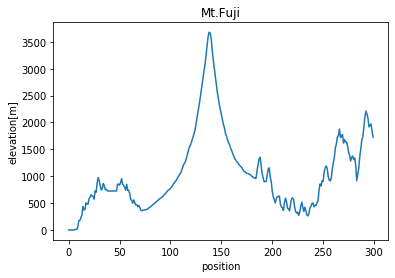

In [3]:
# 【問題1】データの可視化

import matplotlib.pyplot as plt
%matplotlib inline

plt.title('Mt.Fuji')
plt.xlabel('position')
plt.ylabel('elevation[m]')
plt.plot(fuji[:, 0], fuji[:, 3])
plt.show()

In [4]:
# 【問題2】ある地点の勾配を計算する関数を作成

def compute_grad(i):
    dx = fuji[i, 0] - fuji[i-1, 0]
    dy = fuji[i, 3] - fuji[i-1, 3]
    grad = dy / dx
    return grad

# 何でもいいけど、例えば「地点7」の勾配を求める
print(compute_grad(7))

0.5899999999999999


In [5]:
# 【問題3】移動先の地点を計算する関数を作成

def compute_point(present_point):
    alpha = 0.2
    grad = compute_grad(present_point)
    next_point = present_point - alpha*grad
    if 0 <= next_point < 300:
        x = round(next_point)
    else:
        x = round(present_point)
    
    return int(x)

# 境界値で実験する
print(compute_point(299))

299


In [6]:
# 【問題4】山を下る関数を作成

def has_duplicates(seq):
    return len(seq) != len(set(seq))

# 同じ点に到達するまで繰り返し処理
# 同じ点になると同じルートを無限ループする
def descent_mount(present_point):
    result = [present_point]
   
    while has_duplicates(result) == False:
        post_x = compute_point(result[-1])
        result.append(post_x)
    result.pop()
        
    return result

# 頂上(地点136)から下ってみる
print(descent_mount(136))
print(len(descent_mount(136)))

[136, 102, 98, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77, 75]
14


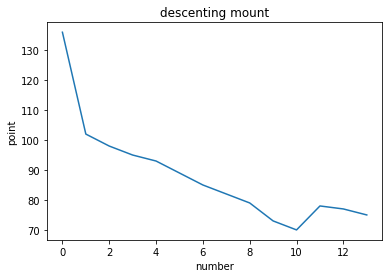

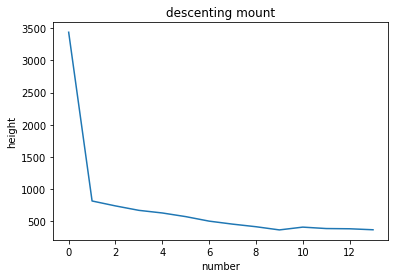

In [8]:
# 【問題5】下山過程の可視化

%matplotlib inline
import matplotlib.pyplot as plt

x_list = [i for i in range(len(descent_mount(136)))]
plt.title('descenting mount')
plt.xlabel('number')
plt.ylabel('point')
plt.plot(x_list, descent_mount(136))
plt.show()

height_list = []
for i in descent_mount(136):
    height = fuji[i, 3]
    height_list.append(height)
    
plt.title('descenting mount')
plt.xlabel('number')
plt.ylabel('height')
plt.plot(x_list, height_list)
plt.show()

In [11]:
point_list = descent_mount(136)

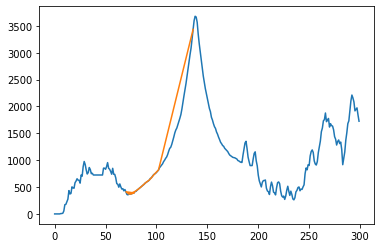

In [18]:
plt.plot(fuji[:, 0], fuji[:, 3])
plt.plot(fuji[point_list, 0], fuji[point_list, 3])
plt.show()

In [19]:
# 【問題6】初期値の変更
for i in range(len(fuji)):
    y = descent_mount(i)
    print(y)

[0]
[1]
[2]
[3]
[4]
[5]
[6, 5]
[7]
[8, 7]
[9, 1]
[10]
[11, 10]
[12, 2]
[13, 4]
[14]
[15, 27, 31, 51, 41]
[16, 14]
[17]
[18, 22, 13, 4]
[19, 21, 15, 27, 31, 51, 41]
[20]
[21, 15, 27, 31, 51, 41]
[22, 13, 4]
[23, 28]
[24]
[25, 36, 52, 37, 35, 43]
[26]
[27, 31, 51, 41]
[28]
[29, 10]
[30, 41]
[31, 51, 41]
[32, 47]
[33, 27, 31, 51, 41]
[34, 15, 27, 31, 51, 41]
[35, 43]
[36, 52, 37, 35, 43]
[37, 35, 43]
[38, 44]
[39]
[40]
[41]
[42]
[43]
[44]
[45]
[46]
[47]
[48, 22, 13, 4]
[49]
[50, 54, 58, 80]
[51, 41]
[52, 37, 35, 43]
[53, 74]
[54, 58, 80]
[55, 63, 74]
[56, 66, 74]
[57, 35, 43]
[58, 80]
[59]
[60, 73, 70, 78, 77, 75]
[61, 83, 80]
[62, 64, 52, 37, 35, 43]
[63, 74]
[64, 52, 37, 35, 43]
[65, 76, 75]
[66, 74]
[67, 66, 74]
[68, 76, 75]
[69, 64, 52, 37, 35, 43]
[70, 78, 77, 75]
[71, 81, 77, 75]
[72, 73, 70, 78, 77, 75]
[73, 70, 78, 77, 75]
[74]
[75]
[76, 75]
[77, 75]
[78, 77, 75]
[79, 73, 70, 78, 77, 75]
[80]
[81, 77, 75]
[82, 79, 73, 70, 78, 77, 75]
[83, 80]
[84, 81, 77, 75]
[85, 82, 79, 73, 70, 

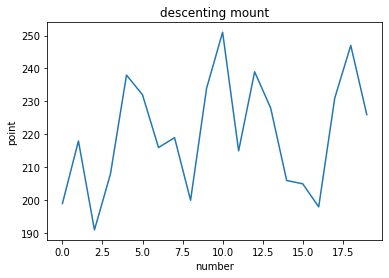

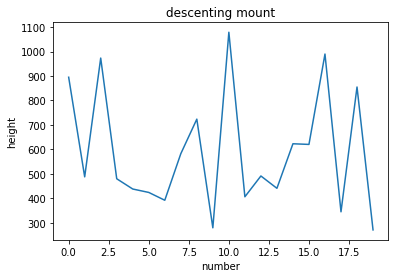

In [20]:
# descent_mount(i)で最も要素数が大きいものを取り出す

import numpy as np


len_list = []
for i in range(len(fuji)):
    length = len(descent_mount(i))
    len_list.append(length)
    
len_max = np.argmax(len_list)

# 199番目のリストを描く

x_list1 = [i for i in range(len(descent_mount(199)))]
plt.title('descenting mount')
plt.xlabel('number')
plt.ylabel('point')
plt.plot(x_list1, descent_mount(199))
plt.show()

height_list1 = []
for i in descent_mount(199):
    height = fuji[i, 3]
    height_list1.append(height)
    
plt.title('descenting mount')
plt.xlabel('number')
plt.ylabel('height')
plt.plot(x_list1, height_list1)
plt.show()

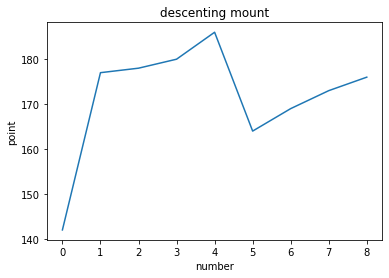

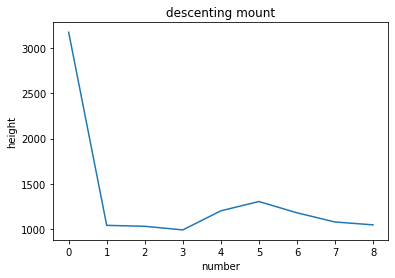

In [21]:
# 142番目のグラフを描く

x_list2 = [i for i in range(len(descent_mount(142)))]
plt.title('descenting mount')
plt.xlabel('number')
plt.ylabel('point')
plt.plot(x_list2, descent_mount(142))
plt.show()

height_list2 = []
for i in descent_mount(142):
    height = fuji[i, 3]
    height_list2.append(height)
    
plt.title('descenting mount')
plt.xlabel('number')
plt.ylabel('height')
plt.plot(x_list2, height_list2)
plt.show()

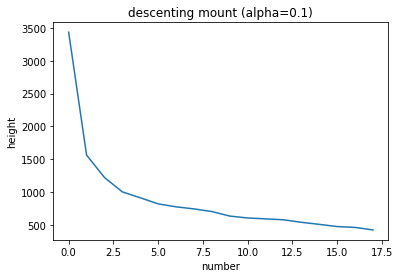

In [22]:
# 【問題7】ハイパーパラメータの変更

# alpha=0.1に変えて下山リストを返す
def compute_point_modified(present_point, alpha=0.1):
        grad = compute_grad(present_point)
        next_point = present_point - alpha*grad
        if 0 <= next_point < 300:
            x = round(next_point)
        else:
            x = round(present_point)
    
        return int(x)

def has_duplicates(seq):
    return len(seq) != len(set(seq))

def descent_mount(present_point):
    result = [present_point]
   
    while has_duplicates(result) == False:
        post_x = compute_point_modified(result[-1])
        result.append(post_x)
    result.pop()
        
    return result

# alpha=0.1の時の下山グラフを描写する
height_list = []
for i in descent_mount(136):
    height = fuji[i, 3]
    height_list.append(height)
    
x_list_alpha = [i for i in range(len(height_list))]

plt.title('descenting mount (alpha=0.1)')
plt.xlabel('number')
plt.ylabel('height')
plt.plot(x_list_alpha, height_list)
plt.show()

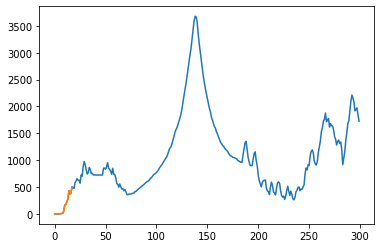

In [24]:
plt.plot(fuji[:, 0], fuji[:, 3])
plt.plot(fuji[x_list_alpha, 0], fuji[x_list_alpha, 3])
plt.show()

学習率を小さくすることで下山までにかかる更新回数が大きくなった。これは勾配方向に進む度合いを小さくしたからである。